In [759]:
# Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [760]:
# Read the csv files
clinical_trial_data = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv("raw_data/mouse_drug_data.csv")

In [761]:
# Check for NAN values and replace with 0
clinical_trial_data.fillna(value=0)

####Test
clinical_trial_data = clinical_trial_data.loc[clinical_trial_data['Mouse ID'] != 'g989']
#x = clinical_trial_data.loc[clinical_trial_data['Mouse ID'] == 'g989']
# len(x)

clinical_trial_data.head()
x = clinical_trial_data.loc[clinical_trial_data['Mouse ID'] == 'b128']
x

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
472,b128,5,45.651331,0
679,b128,10,43.270852,0
719,b128,15,43.784893,0
933,b128,20,42.731552,0
1268,b128,25,43.262145,1
1400,b128,30,40.605335,1
1547,b128,35,37.967644,1
1629,b128,40,38.379726,2
1764,b128,45,38.982878,2


In [762]:
# Check for NAN values and replace with 0
mouse_drug_data.fillna(value=0)
mouse_drug_data = mouse_drug_data.loc[mouse_drug_data['Mouse ID'] != 'g989']

####Test
# x = mouse_drug_data.loc[mouse_drug_data['Mouse ID'] == 'g989']
# x
# mouse_drug_data['Mouse ID'].value_counts().sort_values(ascending=False)

#mouse_drug_data.head()

In [763]:
combined_data_df = clinical_trial_data.merge(mouse_drug_data, on='Mouse ID')
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


### Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

In [764]:
combined_data_grouped_df = combined_data_df.groupby(['Drug', 'Timepoint'])
drug_data_df = pd.DataFrame(combined_data_grouped_df['Tumor Volume (mm3)'].mean())
drug_data_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [765]:
drug_data_pivot_df = pd.pivot_table(drug_data_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
drug_data_pivot_df.round(0)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
5,44.0,47.0,47.0,47.0,47.0,47.0,47.0,44.0,47.0,47.0
10,43.0,48.0,49.0,50.0,49.0,49.0,49.0,43.0,49.0,49.0
15,42.0,50.0,51.0,52.0,51.0,51.0,51.0,41.0,51.0,51.0
20,41.0,52.0,53.0,55.0,54.0,54.0,53.0,40.0,54.0,53.0
25,40.0,54.0,56.0,58.0,57.0,57.0,55.0,39.0,56.0,55.0
30,39.0,57.0,58.0,61.0,60.0,60.0,58.0,39.0,60.0,58.0
35,38.0,59.0,61.0,63.0,63.0,62.0,60.0,37.0,62.0,60.0
40,37.0,61.0,63.0,66.0,66.0,65.0,63.0,37.0,65.0,63.0


In [766]:
standard_errors_df = drug_data_pivot_df.sem(axis=1)
#standard_errors_df

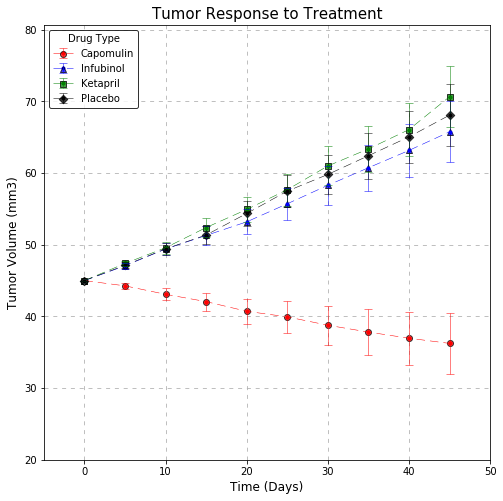

In [767]:
# Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111)

pl1, = plt.plot(drug_data_pivot_df.index, drug_data_pivot_df['Capomulin'], '.r--', linewidth=0.5, dashes=(17,10))
pl2, = plt.plot(drug_data_pivot_df.index, drug_data_pivot_df['Infubinol'], '.b--', linewidth=0.5, dashes=(17,10))
pl3, = plt.plot(drug_data_pivot_df.index, drug_data_pivot_df['Ketapril'], '.g--', linewidth=0.5, dashes=(17,10))
pl4, = plt.plot(drug_data_pivot_df.index, drug_data_pivot_df['Placebo'], '.--', linewidth=0.5, color='black', 
                dashes=(17,10))

pe1 = plt.errorbar(drug_data_pivot_df.index, drug_data_pivot_df['Capomulin'], standard_errors_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='red')
pe2 = plt.errorbar(drug_data_pivot_df.index, drug_data_pivot_df['Infubinol'], standard_errors_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='blue')
pe3 = plt.errorbar(drug_data_pivot_df.index, drug_data_pivot_df['Ketapril'], standard_errors_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='green')
pe4 = plt.errorbar(drug_data_pivot_df.index, drug_data_pivot_df['Placebo'], standard_errors_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='black')

ps1 = plt.scatter(x=drug_data_pivot_df.index, y=drug_data_pivot_df['Capomulin'], marker="o", facecolors="red", 
                  edgecolors="black", alpha=0.75)
ps2 = plt.scatter(x=drug_data_pivot_df.index, y=drug_data_pivot_df['Infubinol'], marker="^", facecolors="blue", 
                  edgecolors="black", alpha=0.75)
ps3 = plt.scatter(x=drug_data_pivot_df.index, y=drug_data_pivot_df['Ketapril'], marker="s", facecolors="green", 
                  edgecolors="black", alpha=0.75)
ps4 = plt.scatter(x=drug_data_pivot_df.index, y=drug_data_pivot_df['Placebo'], marker="D", facecolors="black", 
                  edgecolors="black", alpha=0.75)

legend_df = plt.legend(((pl1,ps1,pe1),(pl2,ps2,pe2),(pl3,ps3,pe3),(pl4,ps4,pe4)), 
                       ('Capomulin','Infubinol','Ketapril','Placebo'), loc='best', title='Drug Type', 
                       frameon=True)
legend_df.get_frame().set_edgecolor('black')

plt.grid(linestyle = '--', dashes=(5,6))

plt.xlim(-5,drug_data_pivot_df.index.max()+5)
plt.ylim(20,drug_data_pivot_df['Ketapril'].max()+10)

plt.rcParams["figure.figsize"] = [8,8]

# Make x-axis, y-axis & title labels
ax.set_title("Tumor Response to Treatment", fontsize=15)
ax.set_xlabel("Time (Days)", fontsize=12)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()

### Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [768]:
combined_data_grouped_df = combined_data_df.groupby(['Drug', 'Timepoint'])
drug_data2_df = pd.DataFrame(combined_data_grouped_df['Metastatic Sites'].mean())
drug_data2_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [769]:
drug_data2_pivot_df = pd.pivot_table(drug_data2_df, index='Timepoint', columns='Drug', values='Metastatic Sites')
drug_data2_pivot_df.round(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.16,0.38,0.28,0.30,0.26,0.38,0.35,0.12,0.26,0.17
10,0.32,0.60,0.67,0.59,0.52,0.83,0.62,0.25,0.52,0.50
15,0.38,0.79,0.90,0.84,0.86,1.25,0.80,0.33,0.81,0.81
20,0.65,1.11,1.05,1.21,1.15,1.53,1.00,0.35,0.95,1.29
25,0.82,1.50,1.28,1.63,1.50,1.94,1.38,0.65,1.17,1.69
30,1.09,1.94,1.59,2.06,2.07,2.27,1.67,0.78,1.41,1.93
35,1.18,2.07,1.67,2.29,2.27,2.64,2.33,0.95,1.53,2.29
40,1.38,2.36,2.10,2.73,2.47,3.17,2.78,1.10,1.58,2.79


In [770]:
standard_errors2_df = drug_data2_pivot_df.sem(axis=1)
#standard_errors2_df

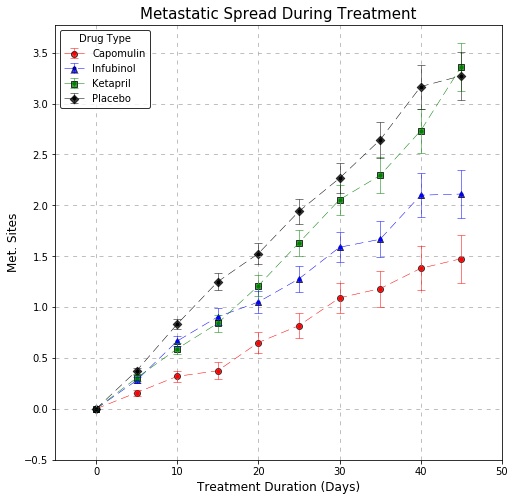

In [771]:
# Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111)

pl1, = plt.plot(drug_data2_pivot_df.index, drug_data2_pivot_df['Capomulin'], '.r--', linewidth=0.5, dashes=(17,10))
pl2, = plt.plot(drug_data2_pivot_df.index, drug_data2_pivot_df['Infubinol'], '.b--', linewidth=0.5, dashes=(17,10))
pl3, = plt.plot(drug_data2_pivot_df.index, drug_data2_pivot_df['Ketapril'], '.g--', linewidth=0.5, dashes=(17,10))
pl4, = plt.plot(drug_data2_pivot_df.index, drug_data2_pivot_df['Placebo'], '.--', linewidth=0.5, color='black', 
                dashes=(17,10))

pe1 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Capomulin'], standard_errors2_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='red')
pe2 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Infubinol'], standard_errors2_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='blue')
pe3 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Ketapril'], standard_errors2_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='green')
pe4 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Placebo'], standard_errors2_df, capsize=4, 
             elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='black')

ps1 = plt.scatter(x=drug_data2_pivot_df.index, y=drug_data2_pivot_df['Capomulin'], marker="o", facecolors="red", 
                  edgecolors="black", alpha=0.75)
ps2 = plt.scatter(x=drug_data2_pivot_df.index, y=drug_data2_pivot_df['Infubinol'], marker="^", facecolors="blue", 
                  edgecolors="black", alpha=0.75)
ps3 = plt.scatter(x=drug_data2_pivot_df.index, y=drug_data2_pivot_df['Ketapril'], marker="s", facecolors="green", 
                  edgecolors="black", alpha=0.75)
ps4 = plt.scatter(x=drug_data2_pivot_df.index, y=drug_data2_pivot_df['Placebo'], marker="D", facecolors="black", 
                  edgecolors="black", alpha=0.75)

legend_df = plt.legend(((pl1,ps1,pe1),(pl2,ps2,pe2),(pl3,ps3,pe3),(pl4,ps4,pe4)), 
                       ('Capomulin','Infubinol','Ketapril','Placebo'), loc='best', title='Drug Type', 
                       frameon=True)
legend_df.get_frame().set_edgecolor('black')

plt.grid(linestyle = '--', dashes=(5,6))

plt.xlim(-5,drug_data2_pivot_df.index.max()+5)
plt.ylim(-0.5,drug_data2_pivot_df['Placebo'].max()+.5)

plt.rcParams["figure.figsize"] = [8,8]

# Make x-axis, y-axis & title labels
ax.set_title("Metastatic Spread During Treatment", fontsize=15)
ax.set_xlabel("Treatment Duration (Days)", fontsize=12)
ax.set_ylabel("Met. Sites", fontsize=12)

plt.show()

### Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [772]:
combined_data_grouped_df = combined_data_df.groupby(['Drug', 'Timepoint'])
drug_data3_df = pd.DataFrame(combined_data_grouped_df['Mouse ID'].count())
drug_data3_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [773]:
drug_data3_pivot_df = pd.pivot_table(drug_data3_df, index='Timepoint', columns='Drug', values='Mouse ID')
drug_data3_pivot_df.head()
#drug_data3_pivot_df.columns

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


In [774]:
for column in drug_data3_pivot_df.columns:
    drug_data3_pivot_df[column+' Percent'] = (drug_data3_pivot_df[column]/drug_data3_pivot_df[column][0])*100

drug_data3_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin Percent,Ceftamin Percent,Infubinol Percent,Ketapril Percent,Naftisol Percent,Placebo Percent,Propriva Percent,Ramicane Percent,Stelasyn Percent,Zoniferol Percent
Timepoint,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,25,21,25,23,23,24,23,25,23,24,100.0,84.0,100.0,92.0,92.0,96.0,95.833333,100.0,95.833333,96.0
10,25,20,21,22,21,24,21,24,21,22,100.0,80.0,84.0,88.0,84.0,96.0,87.500000,96.0,87.500000,88.0
15,24,19,21,19,21,20,15,24,21,21,96.0,76.0,84.0,76.0,84.0,80.0,62.500000,96.0,87.500000,84.0
20,23,18,20,19,20,19,15,23,19,17,92.0,72.0,80.0,76.0,80.0,76.0,62.500000,92.0,79.166667,68.0
25,22,18,18,19,18,17,13,23,18,16,88.0,72.0,72.0,76.0,72.0,68.0,54.166667,92.0,75.000000,64.0
30,22,16,17,18,15,15,12,23,17,15,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,70.833333,60.0
35,22,14,12,17,15,14,9,21,15,14,88.0,56.0,48.0,68.0,60.0,56.0,37.500000,84.0,62.500000,56.0
40,21,14,10,15,15,12,9,20,12,14,84.0,56.0,40.0,60.0,60.0,48.0,37.500000,80.0,50.000000,56.0


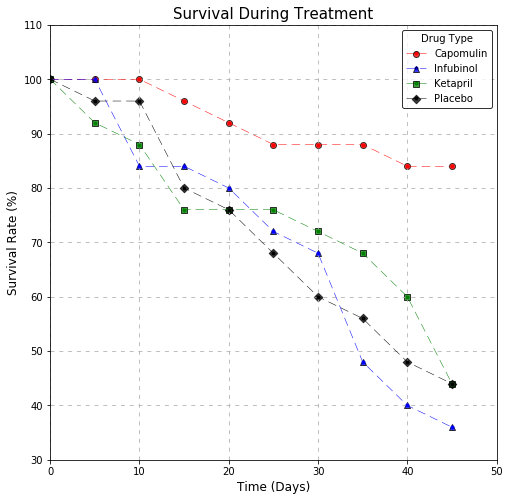

In [775]:
# Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111)

pl1, = plt.plot(drug_data3_pivot_df.index, drug_data3_pivot_df['Capomulin Percent'], '.r--', linewidth=0.5, dashes=(17,10))
pl2, = plt.plot(drug_data3_pivot_df.index, drug_data3_pivot_df['Infubinol Percent'], '.b--', linewidth=0.5, dashes=(17,10))
pl3, = plt.plot(drug_data3_pivot_df.index, drug_data3_pivot_df['Ketapril Percent'], '.g--', linewidth=0.5, dashes=(17,10))
pl4, = plt.plot(drug_data3_pivot_df.index, drug_data3_pivot_df['Placebo Percent'], '.--', linewidth=0.5, color='black', 
                dashes=(17,10))

# pe1 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Capomulin'], standard_errors2_df, capsize=4, 
#              elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='red')
# pe2 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Infubinol'], standard_errors2_df, capsize=4, 
#              elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='blue')
# pe3 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Ketapril'], standard_errors2_df, capsize=4, 
#              elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='green')
# pe4 = plt.errorbar(drug_data2_pivot_df.index, drug_data2_pivot_df['Placebo'], standard_errors2_df, capsize=4, 
#              elinewidth=0.5, markeredgewidth=.5, fmt='none', ecolor='black')

ps1 = plt.scatter(x=drug_data3_pivot_df.index, y=drug_data3_pivot_df['Capomulin Percent'], marker="o", facecolors="red", 
                  edgecolors="black", alpha=0.75)
ps2 = plt.scatter(x=drug_data3_pivot_df.index, y=drug_data3_pivot_df['Infubinol Percent'], marker="^", facecolors="blue", 
                  edgecolors="black", alpha=0.75)
ps3 = plt.scatter(x=drug_data3_pivot_df.index, y=drug_data3_pivot_df['Ketapril Percent'], marker="s", facecolors="green", 
                  edgecolors="black", alpha=0.75)
ps4 = plt.scatter(x=drug_data3_pivot_df.index, y=drug_data3_pivot_df['Placebo Percent'], marker="D", facecolors="black", 
                  edgecolors="black", alpha=0.75)

legend_df = plt.legend(((pl1,ps1),(pl2,ps2),(pl3,ps3),(pl4,ps4)), 
                       ('Capomulin','Infubinol','Ketapril','Placebo'), loc='best', title='Drug Type', 
                       frameon=True)
legend_df.get_frame().set_edgecolor('black')

plt.grid(linestyle = '--', dashes=(5,6))

plt.xlim(0,drug_data3_pivot_df.index.max()+5)
plt.ylim(30,drug_data3_pivot_df['Infubinol Percent'].max()+10)

plt.rcParams["figure.figsize"] = [8,8]

# Make x-axis, y-axis & title labels
ax.set_title("Survival During Treatment", fontsize=15)
ax.set_xlabel("Time (Days)", fontsize=12)
ax.set_ylabel("Survival Rate (%)", fontsize=12)

plt.show()

### Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [776]:
drug_data_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [794]:
tumor_change = {}

for column in drug_data_pivot_df.columns:
    start_value = drug_data_pivot_df[column][0]
    end_value = drug_data_pivot_df[column][45]
    tumor_change[column] = ((end_value-start_value)/start_value)*100
    
#len(drug_data_pivot_df['Capomulin'])
tumor_change_df = pd.Series(tumor_change).reset_index()
tumor_change_df = tumor_change_df.rename(columns = {'index':'Drug', 0:'Tumor Percent change'})
tumor_change_df

,Drug,Tumor Percent change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751
